## Multi-particle in a box spectrum
Consider N distinguishable particles in a box. I want to see how the energy states for these particles.

This experiment has been motivated from Sakurai, Modern Quantum Mechanics, Chapter 4, Problem 1

## Algorithm
Let $N$ be the number of particles. Let $k > N$ be the states upto which we consider in this experiment. Each state has energy $E_m = m^2$. 

For each assigment of $N$ particles to these $k$ states, the total energy of this assignment is defined as the sum of the individual states. 

$\textbf{No two particles are allowed to be in the same state.}$ (This is an assumption)

The total number of possible assignments is $k \choose N$. 

Let $\mathcal{S}$ be a list of energies of all these assignments. The output is the plot of of energies in $\mathcal{S}$ after sorting it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools

In [26]:
def spectrum(N,k):
    '''
    Returns the possible energies of N particles in k particle in a box states assumning each state is 
    occupied only once.
    '''
    assignments = itertools.combinations(range(1,k),N)
    def energy_assignment(assignment):
        '''
        assignment is a tuple of states which are occupied. The return value is the total energy of the assignment 
        obtained by summing over the energy values.
        Particle in a box energies are used
        '''
        return sum([x**2 for x in assignment])

    # set removes degeneracies
    energies = np.sort(list(set([energy_assignment(a) for a in assignments])))
    return energies

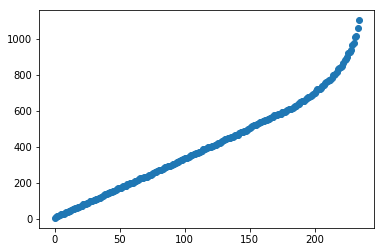

In [27]:
# number of particles
N = 2

# number of states to consider
k = 25
energies = spectrum(N,k)
plt.scatter(range(len(energies)),energies)

## Comparison of total energies for multiple particles

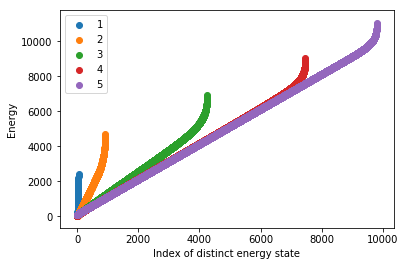

In [37]:
k = 50

energies_1 = spectrum(1,k)
energies_2 = spectrum(2,k)
energies_3 = spectrum(3,k)
energies_4 = spectrum(4,k)
energies_5 = spectrum(5,k)

plt.scatter(range(len(energies_1)),energies_1,label="1")
plt.scatter(range(len(energies_2)),energies_2,label="2")
plt.scatter(range(len(energies_3)),energies_3,label="3")
plt.scatter(range(len(energies_4)),energies_4,label="4")
plt.scatter(range(len(energies_5)),energies_5,label="5")

plt.xlabel("Index of distinct energy state")
plt.ylabel("Energy")

plt.legend()

## Comparison of energy per particle

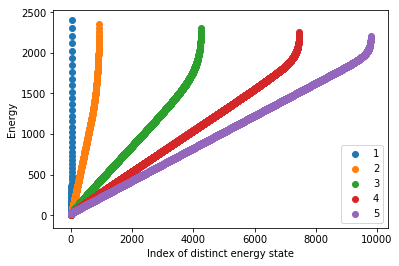

In [38]:
k = 50

energies_1 = spectrum(1,k)
energies_2 = spectrum(2,k)/2
energies_3 = spectrum(3,k)/3
energies_4 = spectrum(4,k)/4
energies_5 = spectrum(5,k)/5

plt.scatter(range(len(energies_1)),energies_1,label="1")
plt.scatter(range(len(energies_2)),energies_2,label="2")
plt.scatter(range(len(energies_3)),energies_3,label="3")
plt.scatter(range(len(energies_4)),energies_4,label="4")
plt.scatter(range(len(energies_5)),energies_5,label="5")

plt.xlabel("Index of distinct energy state")
plt.ylabel("Energy")
plt.legend()

## Plot of diff, just for fun

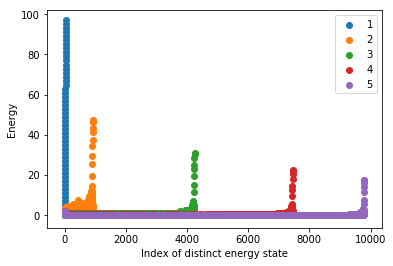

In [42]:
k = 50

energies_1 = np.diff(spectrum(1,k))
energies_2 = np.diff(spectrum(2,k)/2)
energies_3 = np.diff(spectrum(3,k)/3)
energies_4 = np.diff(spectrum(4,k)/4)
energies_5 = np.diff(spectrum(5,k)/5)

plt.scatter(range(len(energies_1)),energies_1,label="1")
plt.scatter(range(len(energies_2)),energies_2,label="2")
plt.scatter(range(len(energies_3)),energies_3,label="3")
plt.scatter(range(len(energies_4)),energies_4,label="4")
plt.scatter(range(len(energies_5)),energies_5,label="5")

plt.xlabel("Index of distinct energy state")
plt.ylabel("Energy")
plt.legend()

# Notes
- The turnoff at the end is artificial and corresponds to not including all the states. It remains in the same position irrespective of the value of k.

- The apporximate slope is around $1/(N-1)$. I do not understand why the spectrum appears to increase linearly with the distict index with this slope.

- The diff graph i.e. graph of energy spacings has interesting features, for instance, the almost constant difference and the $1/N$ styled reduction in the max diff, all of which I don't understand.